# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.decomposition import PCA

# Read Data

In [2]:
data = pd.read_csv("titanic_cleaned.csv")
print(data.shape)

(825, 1625)


# Train A Model on All the features

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, data.columns != 'Survived'], data["Survived"], test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(660, 1624) (165, 1624) (660,) (165,)


In [5]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1,
                                            hidden_layer_sizes=(5,2),
                                            max_iter=90000,activation='tanh',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.8
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        89
           1       0.79      0.76      0.78        76

    accuracy                           0.80       165
   macro avg       0.80      0.80      0.80       165
weighted avg       0.80      0.80      0.80       165

0.7973092844470728


# Feature Engineering

### Remove quasi-constant (very small variance) and zero variance

In [ ]:
data.drop(data.loc[:, data.var() < 0.01], axis = 1, inplace = True)
#TODO: if PassengerId is not dropped in the final result, then drop features with high variance < 0.98

### Remove duplicate features

In [ ]:
data = data.T.drop_duplicates(keep='first').T

### Remove very strongly correlated features

In [ ]:
correlation_matrix = data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
data.drop(data.columns[to_drop], axis = 1, inplace = True)

### Apply PCA on strongly correlated features

In [ ]:
pca = PCA()
pca.fit(data)

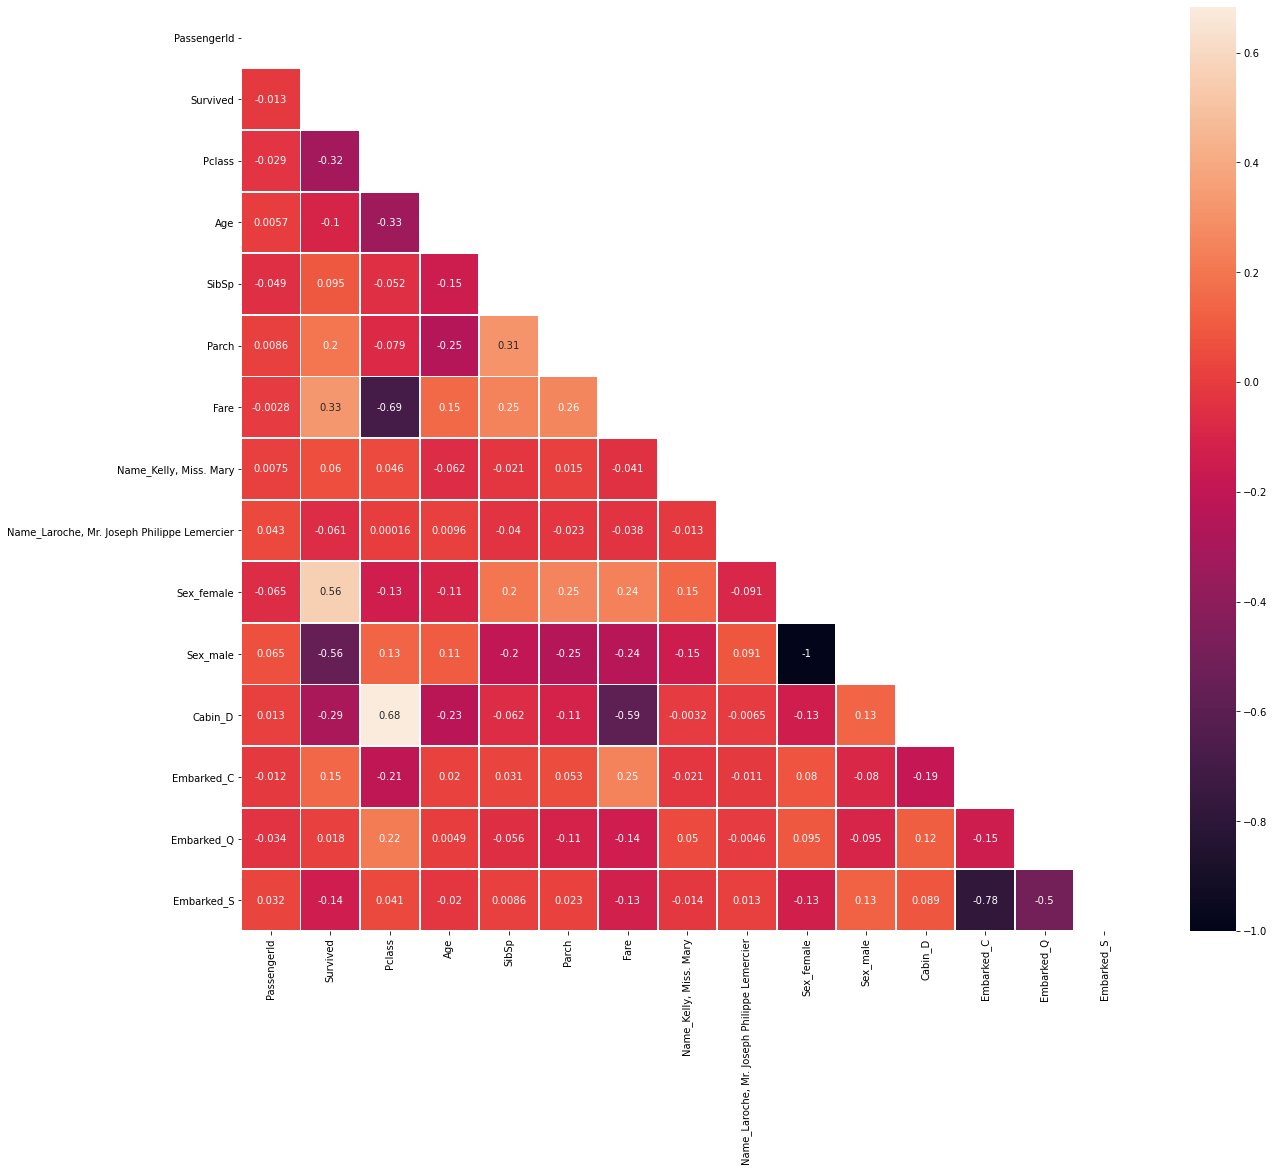

In [5]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [8]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1,
                                            hidden_layer_sizes=(5,2),
                                            max_iter=90000,activation='tanh',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.7818181818181819
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.77      0.66      0.71        67

    accuracy                           0.78       165
   macro avg       0.78      0.76      0.77       165
weighted avg       0.78      0.78      0.78       165

0.762031678342979
